In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output

In [2]:
terror_df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror_df=terror_df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror_df['casualities']=terror_df['Killed']+terror_df['Wounded']

In [3]:
t1=terror_df.copy()


In [4]:
t1=t1[['Year','Month','Day','Country','Region','city','latitude','longitude','Group',
                    'AttackType','Target_type','casualities','Killed','Wounded','Target',
                    'Summary','Target_type','Weapon_type','Motive'
                    ]]
t1=t1.loc[t1['Year']>=2000]

t1['Group']=t1['Group'].str.lower()
t1=t1.loc[(t1['Group']!='unknown')]
t1.loc[t1['Group'].str.contains('qaida'), 'Group'] = 'al-qaida'
t1.loc[t1['Group'].str.contains('achik'), 'Group'] = 'achik matgrik army (ama)'
t1.loc[t1['Group'].str.contains('abkhazian'), 'Group'] = 'abkhazian'
t1.loc[t1['Group'].str.contains('ahrar'), 'Group'] = 'Ahrar al-Sham'
t1.loc[t1['Group'].str.contains('adan'), 'Group'] = 'adan abyan islamic army (AAIA)'
t1.loc[t1['Group'].str.contains('adivasi'), 'Group'] = "Adivasi People's Army (APA)"
t1.loc[t1['Group'].str.contains('shabaab'), 'Group'] = 'al-shabaab'
t1.loc[t1['Group'].str.contains('anarchist'), 'Group'] = 'Anarchist Attack Consortium'
t1.loc[t1['Group'].str.contains('ansar'), 'Group'] = 'Ansar al-Islam'
t1.loc[t1['Group'].str.contains('baloch'), 'Group'] = 'Balochistan National Army'
t1.loc[t1['Group'].str.contains('dima'), 'Group'] = 'Dima Halao Daoga (DHD)'
t1.loc[t1['Group'].str.contains('mujahideen'), 'Group'] = 'Hizbul Mujahideen (HM)'
t1.loc[t1['Group'].str.contains('islamic state of iraq'), 'Group'] = 'Islamic State of Iraq (ISI)'
t1.loc[t1['Group'].str.contains('jaish'), 'Group'] = 'Jaish-e-Islam'
t1.loc[t1['Group'].str.contains('jamaat'), 'Group'] = 'Jamaat-ul-Ahrar'
t1.loc[t1['Group'].str.contains('janatantrik'), 'Group'] = 'Janatantrik Tiger Janashakti Party'
t1.loc[t1['Group'].str.contains('jihadi'), 'Group'] = 'Jihadi-inspired extremists'
t1.loc[t1['Group'].str.contains('jund'), 'Group'] = 'Jund al-Islam'
t1.loc[t1['Group'].str.contains('karbi'), 'Group'] = 'Karbi Tribe'
t1.loc[t1['Group'].str.contains('kuki'), 'Group'] = 'Kuki Liberation Army (KLA)'
t1.loc[t1['Group'].str.contains('kurdi'), 'Group'] = 'Kurdistan Workers Party (PKK)'
t1.loc[t1['Group'].str.contains('lashkar'), 'Group'] = 'Lashkar-e-Islam'
t1.loc[t1['Group'].str.contains('liwa'), 'Group'] = 'Liwa al-Islam'
t1.loc[t1['Group'].str.contains('left-wing'), 'Group'] = 'Left-wing extremists'
t1.loc[t1['Group'].str.contains('maoists'), 'Group'] = 'Maoists'
t1.loc[t1['Group'].str.contains('mujahedeen'), 'Group'] = 'Hizbul Mujahideen (HM)'
t1.loc[t1['Group'].str.contains('mujahedin'), 'Group'] = 'Hizbul Mujahideen (HM)'
t1.loc[t1['Group'].str.contains('mujahidin'), 'Group'] = 'Hizbul Mujahideen (HM)'
t1.loc[t1['Group'].str.contains('popular resistance'), 'Group'] = 'Popular Resistance Committees'
t1.loc[t1['Group'].str.contains('palestinian'), 'Group'] = 'Palestinians'
t1.loc[t1['Group'].str.contains('right-wing'), 'Group'] = 'Right-Wing Group'
t1.loc[t1['Group'].str.contains('samyukta'), 'Group'] = 'Samyukta Terai Madhes Mukti Party'
t1.loc[t1['Group'].str.contains('taliban'), 'Group'] = 'Taliban'
t1.loc[t1['Group'].str.contains('tehrik'), 'Group'] = 'Tehrik-e-Khilafat'

#iraq






In [11]:
t1.to_csv('global_terrorism_filtered.csv',index=True)


In [5]:
t1

,Year,Month,Day,Country,Region,city,latitude,longitude,Group,AttackType,Target_type,casualities,Killed,Wounded,Target,Summary,Target_type,Weapon_type,Motive
69835,2000,1,1,Namibia,Sub-Saharan Africa,Muitjiku,-17.910812,19.988303,national union for the total independence of a...,Armed Assault,Business,7.0,0.0,7.0,A tavern in Muitjiku,01/01/2000: In the first of two related incide...,Business,Firearms,Unknown
69836,2000,1,1,Namibia,Sub-Saharan Africa,Muitjiku,-17.910812,19.988303,national union for the total independence of a...,Hostage Taking (Kidnapping),Business,7.0,0.0,7.0,The Bush Babies nightclub in Muitjiku,01/01/2000: In the second of two related incid...,Business,Firearms,Unknown
69837,2000,1,1,India,South Asia,Udhampur,32.925224,75.135264,Lashkar-e-Islam,Armed Assault,Police,3.0,1.0,2.0,The Central Reserve Police Force 68 battalion ...,01/01/2000: Members of Lashkar-e Taiba attacke...,Police,Firearms,Unknown
69841,2000,1,1,India,South Asia,Kakotibari,27.091373,95.023955,united liberation front of assam (ulfa),Bombing/Explosion,Utilities,0.0,0.0,0.0,An Oil and Natural Gas Commission pipeline at ...,01/01/2000: An Oil and Natural Gas Commission ...,Utilities,Explosives,Unknown
69861,2000,1,1,United States,North America,Mesick,44.405705,-85.714454,earth liberation front (elf),Facility/Infrastructure Attack,Business,0.0,0.0,0.0,commercial logging equipment on the side of M-...,01/1/2000: Four members of the Earth Liberatio...,Business,Incendiary,To sabotage lumbering activity.
69862,2000,1,1,Sri Lanka,South Asia,Iyakachchi,9.563842,80.399966,tamils,Unknown,Military,NaN,63.0,NaN,Military located at an army base at Iyakachchi,1/1/2000: Tamil guerrillas attacked a military...,Military,Unknown,"Specific motive is unknown; however, the Tamil..."
69863,2000,1,2,Germany,Western Europe,Erfurt,50.973734,11.022435,autonomous decorators,Armed Assault,Government (General),0.0,0.0,0.0,The Thuringian Interior Ministry office in Erfurt,01/02/2000: The Thuringian Interior Ministry i...,Government (General),Incendiary,Possibly in protest of the arrest of three mem...
69866,2000,1,2,Colombia,South America,Unknown,7.198606,-75.341218,revolutionary armed forces of colombia (farc),Bombing/Explosion,Utilities,0.0,0.0,0.0,Nine electricity towers within the department ...,01/02/2000: Fuerzas Armadas Revolucionarias de...,Utilities,Explosives,Unknown
69867,2000,1,3,Namibia,Sub-Saharan Africa,Katima Mulilio,-17.503986,24.279230,national union for the total independence of a...,Armed Assault,Tourists,7.0,3.0,4.0,A bus of tourists traveling in Namibia,01/03/2000: Three French children were killed ...,Tourists,Firearms,Unknown
69868,2000,1,3,Lebanon,Middle East & North Africa,Beirut,33.888523,35.503513,Ansar al-Islam,Armed Assault,Government (Diplomatic),NaN,2.0,NaN,Russian Embassy in Beirut,"01/03/2000: The Russian Embassy in Beirut, Leb...",Government (Diplomatic),Firearms,The attack was possibly related to the conflic...


In [7]:
import plotly.graph_objects as go

# Load data frame and tidy it.
#import pandas as pd
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

fig = go.Figure(data=go.Choropleth(
    locations=t1['Country'], # Spatial coordinates
    z = t1['casualities'], # Data to be color-coded
    #locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "cas",
))
'''
fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)'''

fig.show()

In [22]:
t1['Region'].value_counts()

South Asia                     18549
Middle East & North Africa     15686
Sub-Saharan Africa              9204
Southeast Asia                  4397
South America                   2057
Western Europe                  1518
Eastern Europe                  1498
North America                    386
East Asia                         68
Central Asia                      50
Australasia & Oceania             24
Central America & Caribbean       19
Name: Region, dtype: int64

In [35]:
df_a=t1.copy()

In [36]:
df_a=df_a.loc[df_a['Year']==2003]
df_a['Region'].value_counts()

South Asia                     204
Middle East & North Africa     175
Southeast Asia                 113
South America                   87
Sub-Saharan Africa              63
Western Europe                  58
Eastern Europe                  50
North America                   27
Central America & Caribbean      4
Australasia & Oceania            3
Central Asia                     1
East Asia                        1
Name: Region, dtype: int64

In [34]:
df_a=df_a.loc[df_a['Region'].isin(['South Asia','Middle East & North Africa'])]
df_a=df_a.groupby(['Country']).size().reset_index(name='counts')
df_a

,Country,counts
0,Afghanistan,68
1,Algeria,64
2,Bangladesh,1
3,India,105
4,Iraq,11
5,Israel,34
6,Kuwait,1
7,Morocco,5
8,Nepal,12
9,Pakistan,9


In [57]:
df_ny=t1.copy()

In [58]:
df_ny=df_ny[(df_ny['Year']>=2000) & (df_ny['Year']<=2010)]

In [59]:
df_ny= df_ny.loc[df_ny['city'].isin(['New Delhi'])]

In [60]:
df_ny.to_csv('Delhi.csv')

In [25]:
df_ny=df_ny.loc[df_ny['Country'].isin(['United States'])]
df_ny['city'].value_counts()

Bloomington        6
Phoenix            6
San Diego          5
Eugene             4
New York City      4
Chico              4
Albuquerque        3
Petaluma           3
Seattle            3
Ann Arbor          3
Sammamish          2
Erie               2
Emeryville         2
Olympia            2
Cincinnati         2
Los Angeles        2
Houghton           2
Arlington          2
Miller Place       2
Litchfield         1
Mesick             1
St. Paul           1
Albertville        1
Davenport          1
Philadelphia       1
Provo              1
Alamogordo         1
Tamarac            1
Terre Haute        1
Overland Park      1
                  ..
Estacada           1
Capitola           1
Amarillo           1
Pueblo             1
Redwood City       1
Oklahoma City      1
Fremont            1
Tampa              1
Tucson             1
North Vernon       1
West Palm Beach    1
Richmond           1
Kalamazoo          1
Scottsdale         1
Stateline          1
Ohiowa             1
Morrison     

In [44]:
df_ny.to_csv('afghanistan_kabul.csv')

In [25]:
df_t=t1.copy()

In [26]:
df_t=df_t.loc[df_t['Year']==2000]
df_t=df_t.loc[df_t['Region'].isin(['South Asia','Middle East & North Africa'])]
df_t=df_t.groupby(['Country']).agg({'casualities':'count','Killed':'sum','Wounded':'sum'})#['casualities','Killed','Wounded'].sum().reset_index()

In [27]:
df_t

,casualities,Killed,Wounded
Country,,,
Afghanistan,1,0.0,10.0
Algeria,70,338.0,155.0
Bangladesh,1,8.0,0.0
India,100,458.0,333.0
Iran,8,5.0,21.0
Iraq,3,2.0,1.0
Israel,8,9.0,95.0
Jordan,1,0.0,1.0
Lebanon,6,12.0,6.0


In [9]:
new_df=t1.copy()

In [24]:
new_df=new_df.loc[new_df['Region'].isin(['North America','Middle East & North Africa'])]
new_df=new_df.groupby(['Country'])['casualities'].sum().reset_index()
new_df.to_csv('sub_country.csv',index=True)

In [ ]:
df_groups=t1.copy()
#sunburst


In [ ]:
df_groups=df_groups.loc[df_groups['Region'].isin(['North America','Middle East & North Africa'])]
df_groups=df_groups.groupby(['Group']).agg({'AttackType':'Count','casualities':'sum','Killed':'sum','Wounded':'sum'})

In [24]:
#checking null values
terror_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [25]:
#top 5 countries with terrorist attacks
print('Country with Highest Terrorist Attacks:\n',terror_df['Country'].value_counts().nlargest(5))
# nlargest(n)-gives top n values

Country with Highest Terrorist Attacks:
 Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64


In [26]:
print('Regions with Highest Terrorist Attacks:',terror_df['Region'].value_counts().nlargest(5))


Regions with Highest Terrorist Attacks: Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64


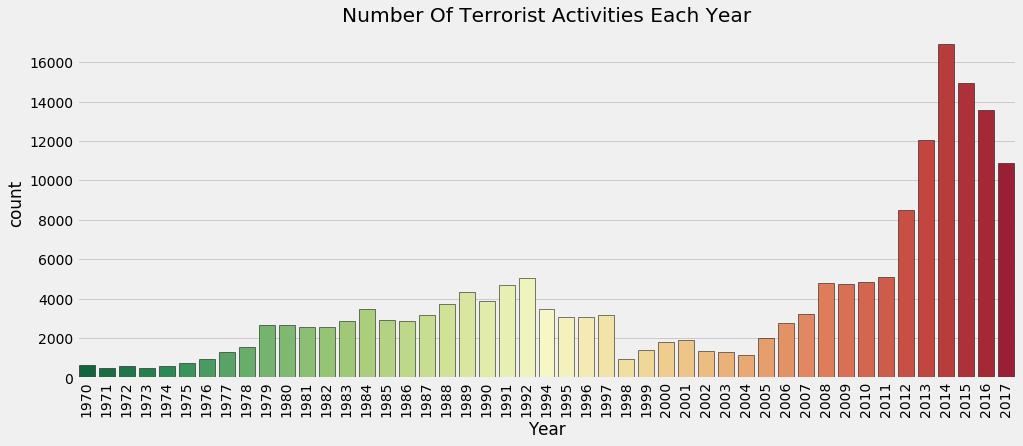

In [27]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_df,palette='RdYlGn_r',edgecolor="black")
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Clearly the number of terrorist activities have gone up sharply after 2000.

In [28]:
#sketchable data subset
# take regions north america and Middle East & North Africa 
#take years 2007-2017
'''sub_terror=terror_df.copy()
sub_terror=sub_terror.loc[(sub_terror['Group']!='Unknown')]
sub_terror.head(10)'''

"sub_terror=terror_df.copy()\nsub_terror=sub_terror.loc[(sub_terror['Group']!='Unknown')]\nsub_terror.head(10)"

In [34]:
sub_terror=terror_df.copy()
sub_terror=sub_terror.loc[(sub_terror['Year']>=1970) & (sub_terror['Year']<=2000)]
sub_terror=sub_terror.loc[(sub_terror['Group']!='Unknown')]
#sub_terror['Year'].value_counts()
sub_terror=sub_terror.loc[sub_terror['Region'].isin(['North America','Middle East & North Africa'])]
sub_terror['Group'].value_counts()

Palestinians                                            1085
Kurdistan Workers' Party (PKK)                           918
Hezbollah                                                318
Al-Gama'at al-Islamiyya (IG)                             257
Dev Sol                                                  236
Anti-Abortion extremists                                 178
Islamist extremists                                      173
Left-Wing Militants                                      170
Palestine Liberation Organization (PLO)                  169
Armed Islamic Group (GIA)                                158
Islamic Salvation Front (FIS)                            153
Fuerzas Armadas de Liberacion Nacional (FALN)            120
Mujahedin-e Khalq (MEK)                                  105
Muslim Militants                                         100
Hamas (Islamic Resistance Movement)                       93
Muslim Brotherhood                                        86
New World Liberation Fro

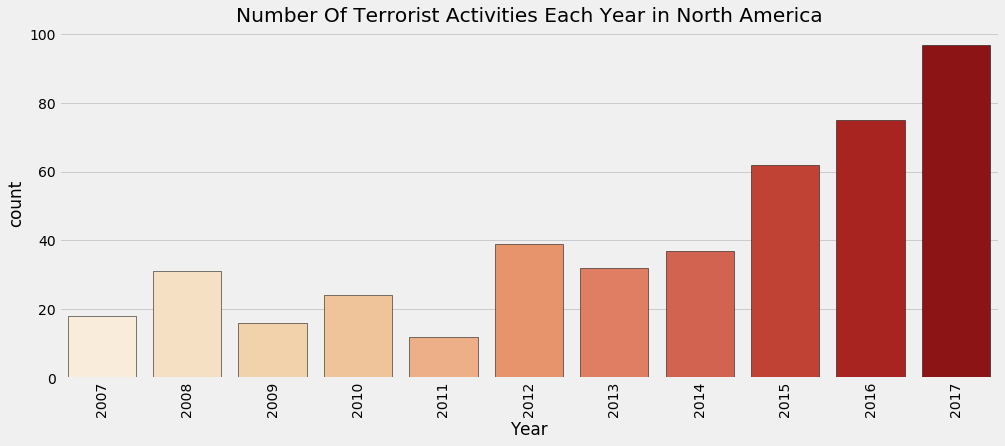

In [30]:
# deaths in north america
na_df=sub_terror.copy()
na_df=na_df.loc[na_df['Region']=="North America"]

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=na_df,palette='OrRd',edgecolor="black")
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year in North America')
plt.show()

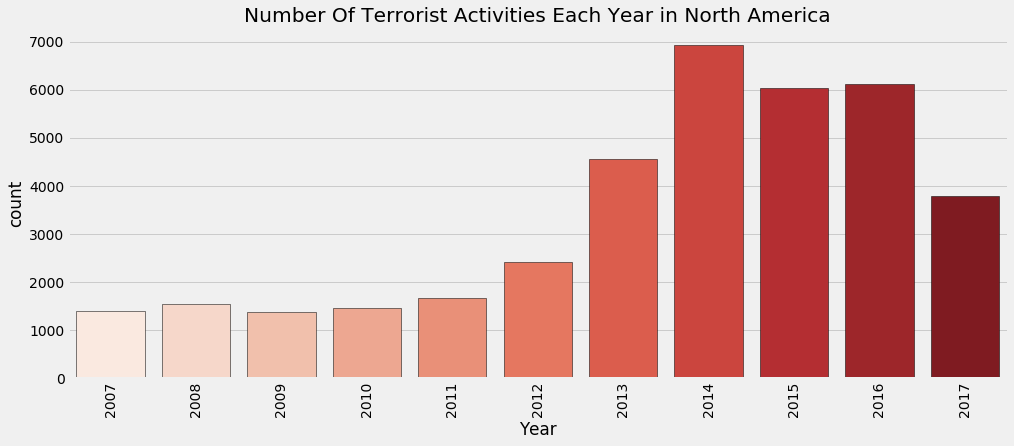

In [31]:
middle_df=sub_terror.copy()
middle_df=middle_df.loc[middle_df['Region']=="Middle East & North Africa"]

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=middle_df,palette='Reds',edgecolor="black")
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year in North America')
plt.show()

In [32]:
middle_df['Group'].value_counts()

Unknown                                                 23060
Islamic State of Iraq and the Levant (ISIL)              5563
Kurdistan Workers' Party (PKK)                           1161
Houthi extremists (Ansar Allah)                          1061
Al-Qaida in the Arabian Peninsula (AQAP)                 1012
Al-Qaida in Iraq                                          557
Sinai Province of the Islamic State                       445
Palestinian Extremists                                    417
Muslim extremists                                         352
Tripoli Province of the Islamic State                     350
Al-Nusrah Front                                           277
Al-Qaida in the Islamic Maghreb (AQIM)                    188
Hamas (Islamic Resistance Movement)                       169
Barqa Province of the Islamic State                       154
Islamic State of Iraq (ISI)                               145
Free Syrian Army                                          120
Tribesme

In [3]:
df=pd.read_csv('global_terrorism_filtered.csv')
df

,Unnamed: 0,Year,Country,Region,city,latitude,longitude,Group,AttackType,Target_type,casualities
0,69835,2000,Namibia,Sub-Saharan Africa,Muitjiku,-17.910812,19.988303,national union for the total independence of a...,Armed Assault,Business,7.0
1,69836,2000,Namibia,Sub-Saharan Africa,Muitjiku,-17.910812,19.988303,national union for the total independence of a...,Hostage Taking (Kidnapping),Business,7.0
2,69837,2000,India,South Asia,Udhampur,32.925224,75.135264,Lashkar-e-Islam,Armed Assault,Police,3.0
3,69841,2000,India,South Asia,Kakotibari,27.091373,95.023955,united liberation front of assam (ulfa),Bombing/Explosion,Utilities,0.0
4,69861,2000,United States,North America,Mesick,44.405705,-85.714454,earth liberation front (elf),Facility/Infrastructure Attack,Business,0.0
5,69862,2000,Sri Lanka,South Asia,Iyakachchi,9.563842,80.399966,tamils,Unknown,Military,NaN
6,69863,2000,Germany,Western Europe,Erfurt,50.973734,11.022435,autonomous decorators,Armed Assault,Government (General),0.0
7,69866,2000,Colombia,South America,Unknown,7.198606,-75.341218,revolutionary armed forces of colombia (farc),Bombing/Explosion,Utilities,0.0
8,69867,2000,Namibia,Sub-Saharan Africa,Katima Mulilio,-17.503986,24.279230,national union for the total independence of a...,Armed Assault,Tourists,7.0
9,69868,2000,Lebanon,Middle East & North Africa,Beirut,33.888523,35.503513,Ansar al-Islam,Armed Assault,Government (Diplomatic),NaN


In [5]:
yearIndex = pd.Index([i for i in range(2000,2018)])
yearIndex

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64')

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.tools as tls
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [18]:
terror_df=pd.read_csv('global_terrorism_filtered.csv')
terror_df.head(5)

,Unnamed: 0,Year,Country,Region,city,latitude,longitude,Group,AttackType,Target_type,casualities
0,69835,2000,Namibia,Sub-Saharan Africa,Muitjiku,-17.910812,19.988303,national union for the total independence of a...,Armed Assault,Business,7.0
1,69836,2000,Namibia,Sub-Saharan Africa,Muitjiku,-17.910812,19.988303,national union for the total independence of a...,Hostage Taking (Kidnapping),Business,7.0
2,69837,2000,India,South Asia,Udhampur,32.925224,75.135264,Lashkar-e-Islam,Armed Assault,Police,3.0
3,69841,2000,India,South Asia,Kakotibari,27.091373,95.023955,united liberation front of assam (ulfa),Bombing/Explosion,Utilities,0.0
4,69861,2000,United States,North America,Mesick,44.405705,-85.714454,earth liberation front (elf),Facility/Infrastructure Attack,Business,0.0


In [19]:
cntry=terror_df.copy()
#cntry=cntry.groupby(['Year','Country'])['casualities'].sum()
cntry=cntry.groupby(['Year'],as_index=False)['casualities'].sum()
cntry.head(20)

,Year,casualities
0,2000,5709.0
1,2001,26041.0
2,2002,7743.0
3,2003,7594.0
4,2004,10731.0
5,2005,9231.0
6,2006,6940.0
7,2007,10928.0
8,2008,13028.0
9,2009,13542.0


In [32]:
y=cntry['casualities'].value_counts().values
trace1 = go.Bar(
        x=cntry['Year'],
        y=cntry['casualities'],
        marker=dict(
            color=y,
            colorscale = 'Viridis',
        ),
        name="attacks per year",    
    )
layout = dict(
        title="attacks per year",
        #width = 900, height = 500,
        xaxis=dict(
            title='Year',
            tickmode='linear'),
        yaxis=dict(
            showgrid=True,
            showline=False,
            showticklabels=True,
    #         domain=[0, 0.85],
        ), 
    )
fig1 = go.Figure(data=[trace1], layout=layout)
fig1.show()

In [57]:
scatter_data=terror_df.copy()
scatter_data=scatter_data.groupby(['Region','Country'],as_index=False)['casualities'].sum()
#scatter_data['Country'].value_counts().values

In [58]:
scatter_data

,Region,Country,casualities
0,Australasia & Oceania,Australia,136.0
1,Australasia & Oceania,Fiji,26.0
2,Australasia & Oceania,French Polynesia,13.0
3,Australasia & Oceania,New Caledonia,58.0
4,Australasia & Oceania,New Hebrides,0.0
5,Australasia & Oceania,New Zealand,3.0
6,Australasia & Oceania,Papua New Guinea,169.0
7,Australasia & Oceania,Solomon Islands,4.0
8,Australasia & Oceania,Vanuatu,0.0
9,Australasia & Oceania,Wallis and Futuna,0.0


In [59]:
figure={
            'data': [
                go.Scatter(
                    y=scatter_data['casualities'],
                    x=scatter_data['Region'],
                    text=scatter_data['Country'],
                    mode='markers',
                    opacity=0.7,
                    marker={
                        'size': 15,
                        'line': {'width': 0.5, 'color': 'white'}
                    },
                    name='sd'
                ) #for i in df.Region.unique()
            ],
            'layout': go.Layout(
                xaxis={'title': 'Regions'},
                yaxis={'title': 'casualities'},
                margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
                legend={'x': 0, 'y': 1},
                hovermode='closest'
            )
        }
fig=go.Figure(figure)
fig.show()

In [38]:
import random
import plotly.express as px

In [60]:
df_terror = pd.read_csv('terrorism_final.csv')
df_terror = df_terror[(df_terror['Killed'] > 0) | (df_terror['Wounded'] > 0)]


,EventId,Year,Month,Day,Country,Region,City,Latitude,Longitude,Group,AttackType,Casualties,Killed,Wounded,Target,TargetType,WeaponType,Motive,Summary,Code
0,0,2000,1,1,Namibia,Sub-Saharan Africa,Muitjiku,-17.910812,19.988303,national union for the total independence of a...,Armed Assault,7,0.0,7.0,A tavern in Muitjiku,Business,Firearms,Unknown,01/01/2000: In the first of two related incide...,NAM
1,1,2000,1,1,Namibia,Sub-Saharan Africa,Muitjiku,-17.910812,19.988303,national union for the total independence of a...,Hostage Taking (Kidnapping),7,0.0,7.0,The Bush Babies nightclub in Muitjiku,Business,Firearms,Unknown,01/01/2000: In the second of two related incid...,NAM
2,2,2000,1,1,India,South Asia,Udhampur,32.925224,75.135264,Lashkar-e-Islam,Armed Assault,3,1.0,2.0,The Central Reserve Police Force 68 battalion ...,Police,Firearms,Unknown,01/01/2000: Members of Lashkar-e Taiba attacke...,IND
5,5,2000,1,1,Sri Lanka,South Asia,Iyakachchi,9.563842,80.399966,tamils,Unknown,63,63.0,0.0,Military located at an army base at Iyakachchi,Military,Unknown,"Specific motive is unknown; however, the Tamil...",1/1/2000: Tamil guerrillas attacked a military...,LKA
8,8,2000,1,3,Namibia,Sub-Saharan Africa,Katima Mulilio,-17.503986,24.279230,national union for the total independence of a...,Armed Assault,7,3.0,4.0,A bus of tourists traveling in Namibia,Tourists,Firearms,Unknown,01/03/2000: Three French children were killed ...,NAM
9,9,2000,1,3,Lebanon,Middle East & North Africa,Beirut,33.888523,35.503513,Ansar al-Islam,Armed Assault,2,2.0,0.0,Russian Embassy in Beirut,Government (Diplomatic),Firearms,The attack was possibly related to the conflic...,"01/03/2000: The Russian Embassy in Beirut, Leb...",LBN
16,16,2000,1,4,Nigeria,Sub-Saharan Africa,Lagos,6.520917,3.379534,odua peoples' congress (opc),Unarmed Assault,2,0.0,2.0,Nigerian police officers.,Police,Chemical,To prevent police from breaking up a fight bet...,01/04/2000: Two Nigerian police officers were...,NGA
17,17,2000,1,5,Sri Lanka,South Asia,Colombo,6.941837,79.861687,liberation tigers of tamil eelam (ltte),Bombing/Explosion,36,11.0,25.0,Sri Lankan Prime Minister Sirima Bandaranaike,Government (General),Explosives,Unknown,01/05/2000: A woman suicide bomber detonated e...,LKA
22,22,2000,1,8,Iraq,Middle East & North Africa,Kalar District,34.633333,45.300000,muslim extremists,Bombing/Explosion,1,1.0,0.0,A group of youths celebrating Id al-Fitr in Ka...,Private Citizens & Property,Explosives,Unknown,"01/08/2000: At 7:30 pm local time, a man ident...",IRQ
23,23,2000,1,8,Indonesia,Southeast Asia,Simpang Ulim,5.096780,97.532600,free aceh movement (gam),Armed Assault,2,2.0,0.0,Simpang Ulim police sector headquarters,Police,Firearms,Unknown,01/08/2000: Two policemen were killed when the...,IDN


In [51]:
def update_country(df):
	df_Terror_By_Country = df[['Region','Country','Code','EventId']]
	df_Terror_By_Country = df_Terror_By_Country.groupby(['Region','Country','Code']).count()
	df_Terror_By_Country = df_Terror_By_Country.reset_index()
	df_Terror_By_Country= df_Terror_By_Country.rename(columns={'EventId':'Count'})
	return df_Terror_By_Country

df_Terror_By_Country = update_country(df_terror)

In [52]:
df_Terror_By_Country

,Region,Country,Code,Count
0,Australasia & Oceania,Australia,AUS,7
1,Australasia & Oceania,Fiji,FJI,1
2,Australasia & Oceania,Solomon Islands,SLB,1
3,Central America & Caribbean,Costa Rica,CRI,1
4,Central America & Caribbean,Guatemala,GTM,3
5,Central America & Caribbean,Haiti,HTI,2
6,Central America & Caribbean,Nicaragua,NIC,3
7,Central America & Caribbean,Panama,PAN,1
8,Central America & Caribbean,St. Lucia,LCA,1
9,Central Asia,Armenia,ARM,1


In [54]:
fig2=px.scatter_geo(df_Terror_By_Country,locations="Code",hover_name="Country",  projection="natural earth")
fig2.show()

In [40]:
figure2={
        'data': [
            go.Scattergeo(lon=terror_df['longitude'],#[x + random.gauss(0.04, 0.03) for x in terror_df[terror_df['city'] == c]['longitude']],
                       lat=terror_df['latitude'],#[x + random.gauss(0.04, 0.03) for x in terror_df[terror_df['city'] == c]['latitude']],
                       name=c,
                       hoverinfo='text',
                       opacity=0.9,
                       marker={'size': 9, 'line': {'width': .2, 'color': '#cccccc'}},
                       hovertext=terror_df[terror_df['city'] == c]['city'].astype(str) + ', ' + \
                          terror_df[terror_df['city'] == c]['Country'].astype(str)+ '<br>' +\
                          'Casualities: ' + terror_df[terror_df['city'] == c]['casualities'].astype(str) + '<br><br>' \
                          ) for c in terror_df['city'].unique()],
            'layout': go.Layout(title='Terrorist Attacks',
                                font={'family': 'Palatino'},
                                titlefont={'size': 22},
                                paper_bgcolor='#eeeeee',
                                plot_bgcolor='#eeeeee',
                                width=1420,
                                height=650)
                    
    }
fig1=go.Figure(figure2)
fig1.show()

KeyboardInterrupt: 

In [ ]:
 ''' geo={'showland': True, 'landcolor': '#eeeeee',
                           'countrycolor': '#cccccc',
                           'showsubunits': True,
                           'subunitcolor': '#cccccc',
                           'subunitwidth': 5,
                           'showcountries': True,
                           'oceancolor': '#eeeeee',
                           'showocean': True,
                           'showcoastlines': True, 
                           'showframe': False,
                           'coastlinecolor': '#cccccc'
                           #'lonaxis': {'range': [terror_df['longitude'].min()-1, terror_df['longitude'].max()+1]},
                           #'lataxis': {'range': [terror_df['latitude'].min()-1, terror_df['latitude'].max()+1]}
                                        }'''